In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import gc
import sys
sys.path.append('./tools')

from load_data import load_split_data, load_set_data, load_test_frames, load_frames_data
from input_distortion import input_distortion,pretraining_input_distortion
from copy import copy

from PretrainingMAE import PretrainingMAE
from MAE import MAE

In [ ]:
# Load data for training
train_seq, val_seq, test_seq = load_split_data() 

data_train = load_set_data(train_seq)
data_val = load_set_data(val_seq)

In [ ]:
# Define models for Pretraining
pretraining =  PretrainingMAE(data_train,data_val)
del data_train, data_val

In [ ]:
# Pretraing RGB Channels independently
pretraining.pretrain_red_channel()
pretraining.pretrain_green_channel()
pretraining.pretrain_blue_channel()

In [ ]:
# Pretraing Inverse-Depth Channel
pretraining.pretrain_depth_channel()

In [ ]:
# Pretraing Semantic Channels independently
pretraining.pretrain_gnd_channel()
pretraining.pretrain_obj_channel()
pretraining.pretrain_bld_channel()
pretraining.pretrain_veg_channel()
pretraining.pretrain_sky_channel()

In [ ]:
# Pretraing Semantic AutoEncoder
pretraining.pretrain_shared_semantics()

In [ ]:
#del pretraining

# Load data for training and testing
train_seq, val_seq, test_seq = load_split_data()

data_train = load_set_data(train_seq)
data_val = load_set_data(val_seq)
#data_test = load_set_data(test_seq)

In [ ]:
# Define Full Model
mae = MAE()

In [ ]:
# Train MultiModal AutoEncoder
mae.train_model(data_train,data_val)
del data_train, data_val

In [ ]:
# Evaluate full MAE
mae.evaluate(data_test,run='20171016-131619')

In [2]:
# Load data for testing by frames
test_frames = load_test_frames()
data_test_frames = load_frames_data(test_frames)

# Evaluate full MAE
if 'mae' not in locals():
    mae = MAE()
    
mae.evaluate_per_frame(data_test_frames,run='20171016-131619')

INFO:tensorflow:Restoring parameters from models/full/20171016-131619/fullmodel.ckpt


INFO:tensorflow:Restoring parameters from models/full/20171016-131619/fullmodel.ckpt


('Size of Test Set:', 697)
('Error (RMS):', 11.006707114244335)
('Error (Relative Error):', 0.33741376670909767)
Intersection over Union per class:
[ 0.7038052   0.27798119  0.44027053  0.63286233  0.68612366]
('Intersection: ', array([ 170791.,   39100.,   76685.,  209473.,   49228.]))
('Union: ', array([ 242668.,  140657.,  174177.,  330993.,   71748.]))


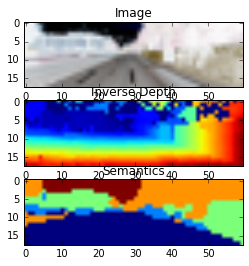

In [9]:
import basic_routines as BR

im = BR.color2image(data_test_frames[0]['xcr'],data_test_frames[0]['xcg'],data_test_frames[0]['xcb'])
imd = BR.depth2image(data_test_frames[0]['xid'],data_test_frames[0]['xmask'])
ims = BR.sem2image(data_test_frames[0]['sem'])

%matplotlib inline

fig,axes = plt.subplots(3,1)
axes[0].imshow(im)
axes[0].set_title('Image')

axes[1].imshow(imd)
axes[1].set_title('Inverse Depth')

axes[2].imshow(ims)
axes[2].set_title('Semantics')

plt.show()

In [ ]:
#a = np.reshape(pretraining.imr_val[0],(60,18))
#print a[1]
#np.reshape(pretraining.imr_val)
#print np.dstack((imr,img,imb)).shape
print data_val[0][0]['xcgLeft']

x = horizontal_mirroring(data_val[0][0]['xcgLeft'],18,60)

print x

In [ ]:
'''
indmirror = np.linspace(0,18*60-1,18*60).astype(int)
indmirror = np.reshape(indmirror,(60,18))
indmirror = indmirror.T
indmirror = np.fliplr(indmirror)
indmirror = indmirror.T
indmirror = np.reshape(indmirror,(18*60))
'''
x = pretraining.imr_train[4,:]#data_val[0][0]['xcgLeft']
x1 = pretraining.imr_train[5,:]

%matplotlib inline

fig,axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(x,(60,18)).T)
axes[0].set_title('im1')

axes[1].imshow(np.reshape(x1,(60,18)).T)
axes[1].set_title('im2')

plt.show()

ind = np.arange(0,10)
imr_in = copy(pretraining.imr_train[ind,:])
imr_batch = copy(pretraining.imr_train[ind,:])
ind_rand_who = np.random.choice(ind,10/2,replace=False)
imr_in = horizontal_mirroring(imr_in,ind_rand_who)
imr_batch = horizontal_mirroring(imr_batch,ind_rand_who)

x = imr_in[4,:]#data_val[0][0]['xcgLeft']
x1 = imr_in[5,:]



fig,axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(x,(60,18)).T)
axes[0].set_title('im1')

axes[1].imshow(np.reshape(x1,(60,18)).T)
axes[1].set_title('im2')

plt.show()

ind_rand_who = np.random.choice(ind,10/2,replace=False)
imr_in = zeroing_channel(imr_in,ind_rand_who)

x = imr_in[4,:]#data_val[0][0]['xcgLeft']
x1 = imr_batch[4,:]



fig,axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(x,(60,18)).T)
axes[0].set_title('im1')

axes[1].imshow(np.reshape(x1,(60,18)).T)
axes[1].set_title('im2')

plt.show()


In [ ]:


print mae.imr_val[0].shape
print mae.depth_mask_val[0].shape
print mae.depth_val[0].shape


In [ ]:
np.count_nonzero()